## Adjusting FVS Boardfoot Volume Estimates

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [12]:
sns.set_style("darkgrid")

In [159]:
# Read in some data showing tree volume estimates using tarif tables produced by OSU Extension
fpath = './FSC_Case_Studies/ORGANON_yield_analysis/Boardfoot_Calculations.xlsx'
osu_df = pd.read_excel(fpath, sheet_name='OSU_VOLUME_DF', header=0, index_col=0, na_values='#N/A')
nvel_df = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_DF', header=0, index_col=0, na_values='#N/A')
osu_gf = pd.read_excel(fpath, sheet_name='OSU_VOLUME_GF', header=0, index_col=0, na_values='#N/A')
nvel_gf = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_GF', header=0, index_col=0, na_values='#N/A')
osu_pp = pd.read_excel(fpath, sheet_name='OSU_VOLUME_PP', header=0, index_col=0, na_values='#N/A')
nvel_pp = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_PP', header=0, index_col=0, na_values='#N/A')
osu_ra = pd.read_excel(fpath, sheet_name='OSU_VOLUME_RA', header=0, index_col=0, na_values='#N/A')
nvel_ra = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_RA', header=0, index_col=0, na_values='#N/A')
osu_rc = pd.read_excel(fpath, sheet_name='OSU_VOLUME_RC', header=0, index_col=0, na_values='#N/A')
nvel_rc = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_RC', header=0, index_col=0, na_values='#N/A')
osu_wh = pd.read_excel(fpath, sheet_name='OSU_VOLUME_WH', header=0, index_col=0, na_values='#N/A')
nvel_wh = pd.read_excel(fpath, sheet_name='NVEL_VOLUME_WH', header=0, index_col=0, na_values='#N/A')

In [99]:
def flat_dropna(df):
    return df.values.flatten()[~np.isnan(df.values.flatten())]

In [160]:
osu_DF = flat_dropna(osu_df)
nvel_DF = flat_dropna(nvel_df)
osu_GF = flat_dropna(osu_gf)
nvel_GF = flat_dropna(nvel_gf)
osu_PP = flat_dropna(osu_pp)
nvel_PP = flat_dropna(nvel_pp)
osu_RC = flat_dropna(osu_rc)
nvel_RC = flat_dropna(nvel_rc)
osu_WH = flat_dropna(osu_wh)
nvel_WH = flat_dropna(nvel_wh)
osu_RA = flat_dropna(osu_ra)
nvel_RA = flat_dropna(nvel_ra)

In [161]:
def BFFDLN(Vo, a0, a1):
    '''Log-linear adjustment of the form:
    ln(Vs) = a0 + a1*ln(Vo)
    
    where:
    Vs: volume corrected for form and defect
    Vo = uncorrected volume
    a0 = intercept
    a1 = slope coefficient'''
    return np.exp(a0 + a1 * np.log(Vo))

In [162]:
def fit_BFFDLN(nvel, osu):
    coef, cov = curve_fit(BFFDLN, nvel, osu)
    print("Best fit: {:0.4f} + {:0.4f}*ln(Vo)".format(coef[0], coef[1]))
    return coef, cov

In [151]:
coef_GF, cov_GF = fit_BFFDLN(nvel_GF, osu_GF)

Best fit: -2.0987 + 1.2273*ln(Vo)


In [153]:
coef_DF, cov_DF = fit_BFFDLN(nvel_DF, osu_DF)

Best fit: -1.3466 + 1.1125*ln(Vo)


In [154]:
coef_PP, cov_PP = fit_BFFDLN(nvel_PP, osu_PP)

Best fit: -1.9479 + 1.1928*ln(Vo)


In [163]:
coef_RA, cov_RA = fit_BFFDLN(nvel_RA, osu_RA)

Best fit: -0.6879 + 1.0860*ln(Vo)


In [164]:
coef_WH, cov_WH = fit_BFFDLN(nvel_WH, osu_WH)

Best fit: -1.5556 + 1.1574*ln(Vo)


C:\Users\ddiaz\AppData\Local\Continuum\miniconda3\envs\fvs\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


In [165]:
coef_RC, cov_RC = fit_BFFDLN(nvel_RC, osu_RC)

Best fit: -1.6059 + 1.1501*ln(Vo)


C:\Users\ddiaz\AppData\Local\Continuum\miniconda3\envs\fvs\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


In [155]:
def make_plot(species):
    plt.plot(np.linspace(0,4500,100),np.linspace(0,4500,100), color='black', linestyle="--", lw=0.75)
    plt.scatter(eval('osu_'+species),eval('nvel_'+species),
            color='red', marker='.', alpha=0.10, label='Unadjusted')
    plt.scatter(eval('osu_'+species),BFFDLN(eval('nvel_'+species), eval('coef_'+species)[0], eval('coef_'+species)[1]),
            color='blue', marker='.', alpha=0.10, label='Adjusted')

    plt.xlim(0,4500)
    plt.ylim(0,4500)
    plt.xlabel('OSU Tarif Volume')
    plt.ylabel('NVEL Volume')
    plt.gca().set_aspect('equal')
    plt.yticks(np.arange(0,4500,1000))
    plt.xticks(np.arange(0,4500,1000))
    plt.grid(which='major', axis='both', markevery=1000)
    plt.title("NVEL Scribner Correction: {}".format(species), weight='bold')
    plt.legend()
    plt.show();

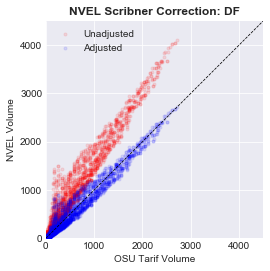

C:\Users\ddiaz\AppData\Local\Continuum\miniconda3\envs\fvs\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


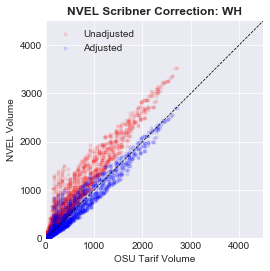

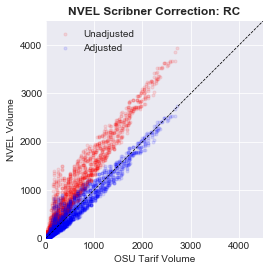

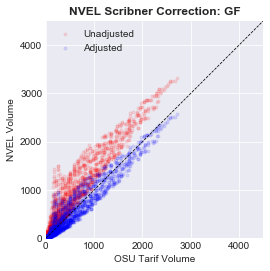

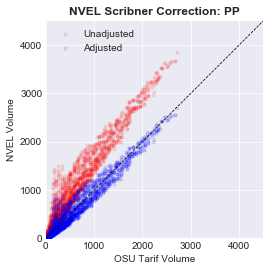

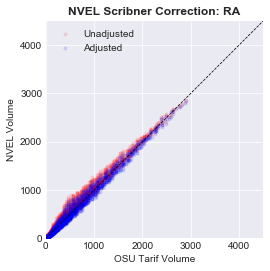

In [166]:
for species in ['DF', 'WH', 'RC', 'GF', 'PP', 'RA']:
    make_plot(species)